In [1]:
# !pip install pytorch_lightning
# !pip install pytorch_forecasting
# !pip install tbats
!pip install japanize_matplotlib
!pip install optuna
!pip install pandas_ta
!pip install shap
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=aa133c4c473176b9845e47e145f333dedbe3e04987516894b95ae9e9f25adec5
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=640655c5942a259838a582273689107544d39fc2d02211d949dde832a9cacb5f
  Stored in directory: /root/.cac

In [2]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# モジュールの読み込み
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns

import time

from sklearn.ensemble import RandomForestRegressor

# import pytorch_lightning as pl
# from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
# from pytorch_lightning.loggers import TensorBoardLogger
# import torch

# from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
# from pytorch_forecasting.data import GroupNormalizer
# from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
# from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

import shap
import japanize_matplotlib
from statsmodels.tsa.stattools import adfuller
import os
import sys
import shutil
HOME_PATH = os.getcwd()
sys.path.append(os.path.join(HOME_PATH, 'backtester'))
sys.path.append(HOME_PATH)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [5]:
import pickle
# 読み込むpickleファイルのパス
folder_path = "drive/MyDrive/見原/Data/data_set.pkl"

# pickleファイルを読み込む
with open(folder_path, 'rb') as file:
    data_set = pickle.load(file)

# 読み込んだDataFrameの表示
display(data_set.head(3))
data_set.head(3).to_csv("drive/MyDrive/見原/Data/data_set.csv")

,Bug ID,Changed,Reporter,Assignee,Component,Resolution,Hardware,OS,Severity,Version,...,TBF__fft_coefficient__attr_real__coeff_0,TBF__cwt_coefficients__coeff_0__w_10__widths_2 5 10 20,TBF__quantile__q_01,TBF__cwt_coefficients__coeff_0__w_5__widths_2 5 10 20,TBF__value_count__value_0,TBF__mean,TBF__quantile__q_02,TBF__count_below__t_0,TBF__range_count__max_1__min_1,TBF__value_count__value_1
Opened,,,,,,,,,,,,,,,,,,,,,
2012-06-26 09:27:15,835466,2013-07-04 02:47:20,David Naori,Alan Pevec,openstack-nova,CURRENTRELEASE,x86_64,Linux,high,1.0 (Essex),...,6.0,1.645634,6.0,2.327277,0.0,6.0,6.0,0.0,0.0,0.0
2012-07-22 13:41:36,842136,2019-09-09 16:10:30,David Naori,Brent Eagles,openstack-nova,ERRATA,Unspecified,Unspecified,medium,1.0 (Essex),...,26.0,7.131079,26.0,10.084869,0.0,26.0,26.0,0.0,0.0,0.0
2012-08-13 14:36:41,847785,2016-04-26 17:07:08,Gary Kotton,Alan Pevec,openstack-quantum,ERRATA,Unspecified,Unspecified,high,1.0 (Essex),...,22.0,6.033990,22.0,8.533350,0.0,22.0,22.0,0.0,0.0,0.0


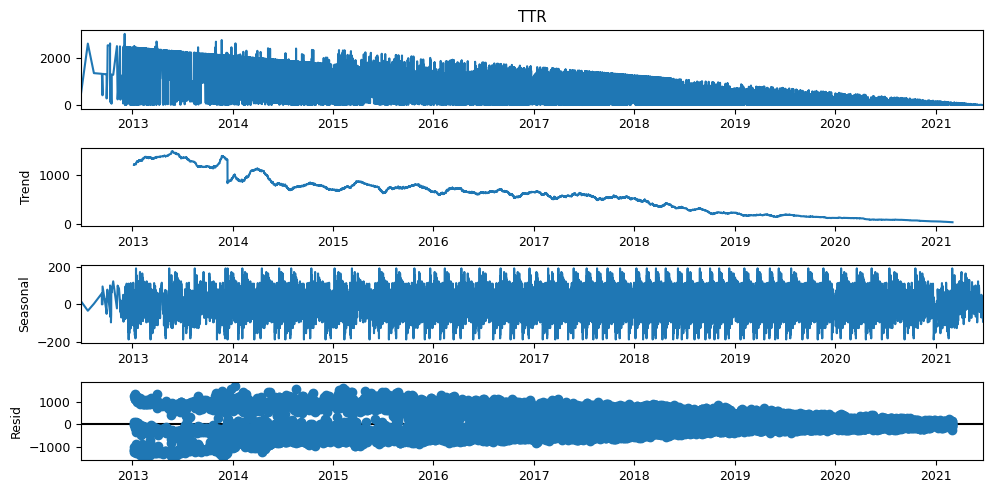

In [ ]:
import statsmodels.api as sm

# Dataをインデックスに設定
time_series = data_set.copy() #.drop(0)
# time_series["TTR"] = np_log(time_series["TTR"])
# 表示サイズ調整
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["font.size"] = 9

# 原系列、傾向（トレンド）、季節変動（季節性）、不規則変動（残差）
def plt_seasonal_decompose(df, col_name, period):
    res = sm.tsa.seasonal_decompose(df[col_name], period=period)
    fig = res.plot()
    plt.savefig("drive/MyDrive/見原/Images/stats.png")
    plt.show()

# 原系列をインプットして確認
plt_seasonal_decompose(time_series, col_name='TTR', period=365)

<Figure size 200x100 with 0 Axes>

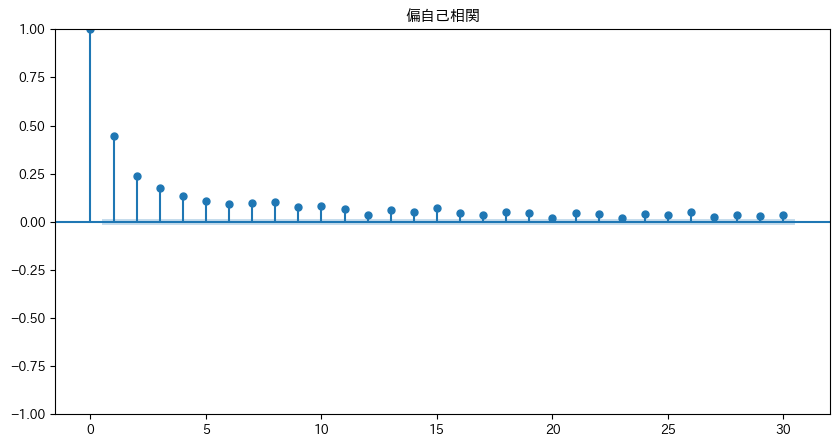

In [ ]:
# 偏自己相関を求める
df_pacf = sm.tsa.stattools.pacf(time_series["TTR"], nlags=30, method='ols')

# 偏自己相関を可視化する
fig = plt.figure(figsize=(2,1))
fig = sm.graphics.tsa.plot_pacf(time_series["TTR"], lags=30)
plt.title('偏自己相関')
plt.savefig("drive/MyDrive/見原/Images/pacf.png")

In [6]:
# ランダムシード固定
from sklearn.utils import check_random_state
import random
seed = 42
random_state = check_random_state(seed)
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [7]:
# "Changed","Summary"をドロップ
data_set_2 = pd.DataFrame(data_set.drop(["Changed","Summary"],axis=1))
display(data_set_2.tail(2))

,Bug ID,Reporter,Assignee,Component,Resolution,Hardware,OS,Severity,Version,TTR,...,TBF__fft_coefficient__attr_real__coeff_0,TBF__cwt_coefficients__coeff_0__w_10__widths_2 5 10 20,TBF__quantile__q_01,TBF__cwt_coefficients__coeff_0__w_5__widths_2 5 10 20,TBF__value_count__value_0,TBF__mean,TBF__quantile__q_02,TBF__count_below__t_0,TBF__range_count__max_1__min_1,TBF__value_count__value_1
Opened,,,,,,,,,,,,,,,,,,,,,
2021-06-21 06:28:11,1974195,Shailesh Chhabdiya,Lee Yarwood,openstack-nova,DUPLICATE,All,Linux,high,13.0 (Queens),2,...,2.0,0.548545,2.0,0.775759,0.0,2.0,2.0,0.0,0.0,0.0
2021-06-22 16:29:20,1974856,Matt Flusche,Unknown,openstack-nova,NOTABUG,x86_64,Linux,high,13.0 (Queens),0,...,1.0,0.274272,1.0,0.387880,0.0,1.0,1.0,0.0,0.0,1.0


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [10]:
# 移動平均を計算し、新しいカラムを作成
# DataLeakage防止のためshift
data_set_2["SMA_5"] = data_set_2["TTR"].shift(1).rolling(window=5).mean()
data_set_2["SMA_9"] = data_set_2["TTR"].shift(1).rolling(window=9).mean()
data_set_2["SMA_11"] = data_set_2["TTR"].shift(1).rolling(window=11).mean()
data_set_2["EMA_5"] = data_set_2["TTR"].shift(1).ewm(span=5).mean()
data_set_2["EMA_9"] = data_set_2["TTR"].shift(1).ewm(span=9).mean()
data_set_2["EMA_11"] = data_set_2["TTR"].shift(1).ewm(span=11).mean()
data_set_2 = data_set_2.dropna()
# print(data_set_2.isnull().sum())
display(data_set_2.head(3))

,Bug ID,Reporter,Assignee,Component,Resolution,Hardware,OS,Severity,Version,TTR,...,TBF__quantile__q_02,TBF__count_below__t_0,TBF__range_count__max_1__min_1,TBF__value_count__value_1,SMA_5,SMA_9,SMA_11,EMA_5,EMA_9,EMA_11
Opened,,,,,,,,,,,,,,,,,,,,,
2012-10-12 20:06:31,865924,Dan Yocum,RHOS Maint,openstack-nova,WORKSFORME,Unspecified,Unspecified,unspecified,1.0 (Essex),117,...,1.0,0.0,0.0,1.0,1346.6,1742.888889,1774.727273,1315.568307,1479.055703,1528.751949
2012-10-14 15:45:27,866193,Yaniv Kaul,RHOS Maint,openstack-nova,INSUFFICIENT_DATA,Unspecified,Unspecified,medium,1.0 (Essex),262,...,1.0,0.0,0.0,1.0,851.2,1475.444444,1666.909091,912.942360,1186.543261,1263.736738
2012-10-14 16:05:47,866199,Yaniv Kaul,Nikola Dipanov,openstack-nova,CURRENTRELEASE,Unspecified,Unspecified,medium,2.0 (Folsom),1285,...,0.0,1.0,1.0,0.0,646.0,1224.111111,1460.454545,694.840918,990.877785,1079.567438


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


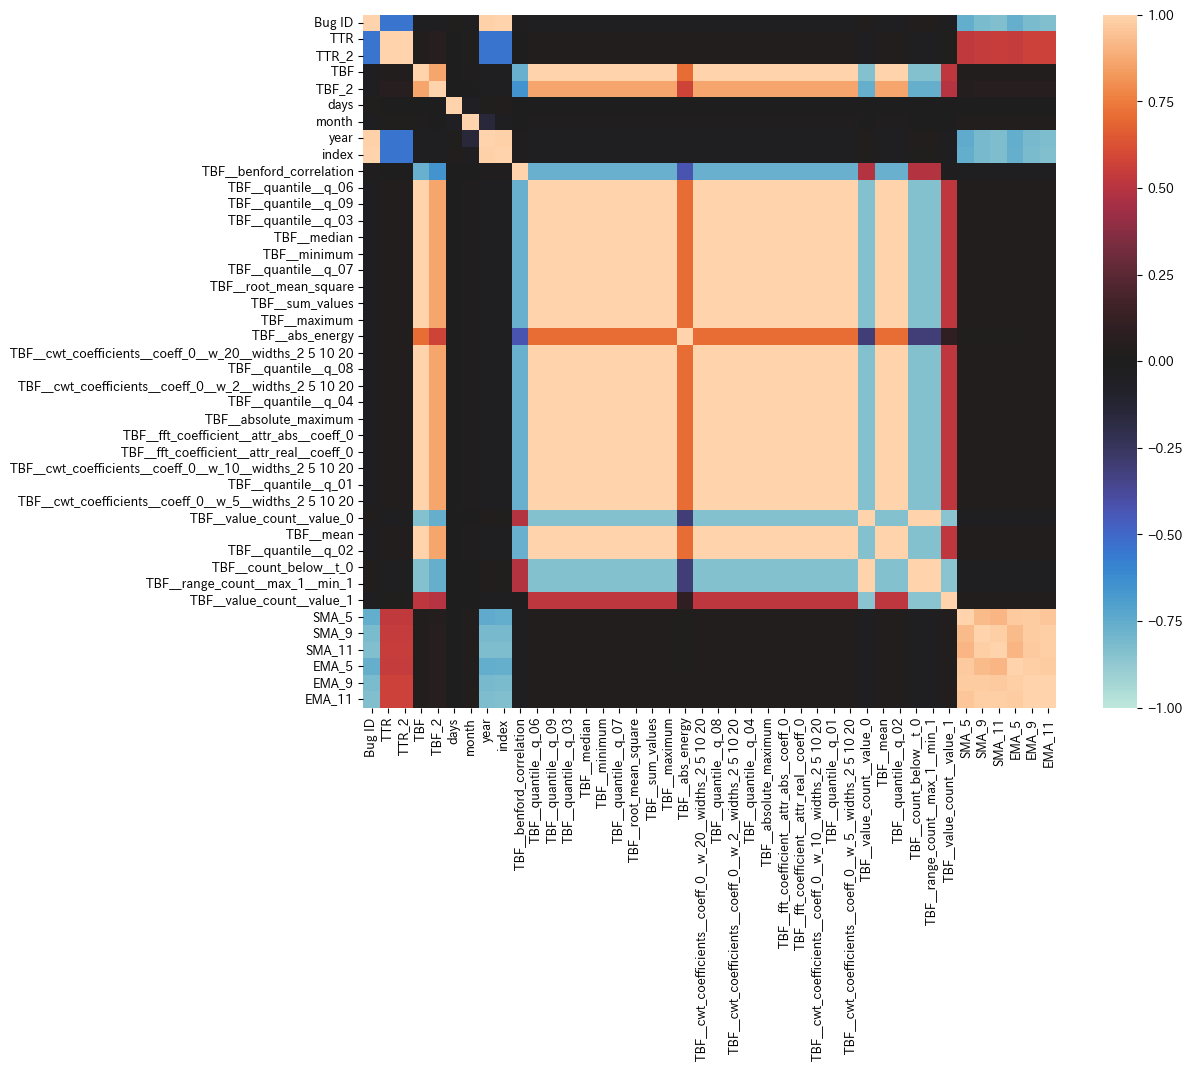

In [ ]:
# ピアソンの積率相関ヒートマップ
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data_set_2.corr(), square=True, vmax=1, vmin=-1, center=0)
plt.savefig("drive/MyDrive/見原/Images/heatmap.png")

## 対数化

In [11]:
# 説明変数
x = pd.DataFrame(data_set_2.drop(["TTR","TTR_2"],axis=1)) # .drop(["hogehoge"]で、"hogehoge"をドロップしてる

# 目的変数
y = pd.DataFrame(data_set_2["TTR"]) # ["hogehoge"]のカラムを"y"に代入

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1, shuffle=False, random_state=random_state)
train, test = train_test_split(data_set_2,test_size=0.1, shuffle=False, random_state=random_state)

In [12]:
def freq_enc(df_train, df_test, cols):
    for col in cols:
        df = pd.concat([df_train[col], df_test[col]])
        vc = df.value_counts(dropna=True, normalize=True).to_dict()
        vc[-1] = -1 # 欠損値を -1 で埋める場合
        # new_col = col + '_freq_enc'
        df_train[col] = df_train[col].map(vc)
        df_train[col] = df_train[col].astype('float32')
        df_test[col] = df_test[col].map(vc)
        df_test[col] = df_test[col].astype('float32')

encoding_column = ["Reporter", "Assignee", "Component", "Resolution",
                  "Hardware", "OS", "Severity", "Version", "Weekday"]
freq_enc(x_train, x_test, encoding_column)
freq_enc(train, test, encoding_column)
train.tail(3)

,Bug ID,Reporter,Assignee,Component,Resolution,Hardware,OS,Severity,Version,TTR,...,TBF__quantile__q_02,TBF__count_below__t_0,TBF__range_count__max_1__min_1,TBF__value_count__value_1,SMA_5,SMA_9,SMA_11,EMA_5,EMA_9,EMA_11
Opened,,,,,,,,,,,,,,,,,,,,,
2020-02-11 06:41:21,1801540,0.001158,0.000737,0.027155,0.100568,0.777181,0.753552,0.116304,0.166509,210,...,0.0,1.0,1.0,0.0,236.2,163.888889,191.909091,178.658949,185.111260,183.040284
2020-02-11 11:01:49,1801612,0.001579,0.001210,0.001737,0.006315,0.777181,0.753552,0.316651,0.038154,66,...,0.0,1.0,1.0,0.0,231.6,183.777778,182.090909,189.105966,190.089008,187.533570
2020-02-11 14:28:47,1801721,0.001000,0.002579,0.015735,0.464056,0.777181,0.753552,0.316651,0.038154,198,...,0.0,1.0,1.0,0.0,181.8,191.000000,159.181818,148.070644,165.271207,167.277975


In [13]:
# def np_log(x):
#     return np.log(np.clip(x, 1e-10, None))
def np_log(x):
    x_nonzero = np.where(x == 0, 1e-10, x)
    return np.log(np.clip(x_nonzero, 1e-10, np.finfo(float).max))

In [15]:
# 対数化

x_train_log = pd.DataFrame(np_log(x_train), index=x_train.index, columns=x_train.columns)
x_test_log = pd.DataFrame(np_log(x_test), index=x_test.index, columns=x_test.columns)

y_train_log = pd.DataFrame(np_log(y_train), index=y_train.index, columns=y_train.columns)
y_test_log = pd.DataFrame(np_log(y_test), index=y_test.index, columns=y_test.columns)

train_log = pd.DataFrame(np_log(train), index=train.index, columns=train.columns)
test_log = pd.DataFrame(np_log(test), index=test.index, columns=test.columns)

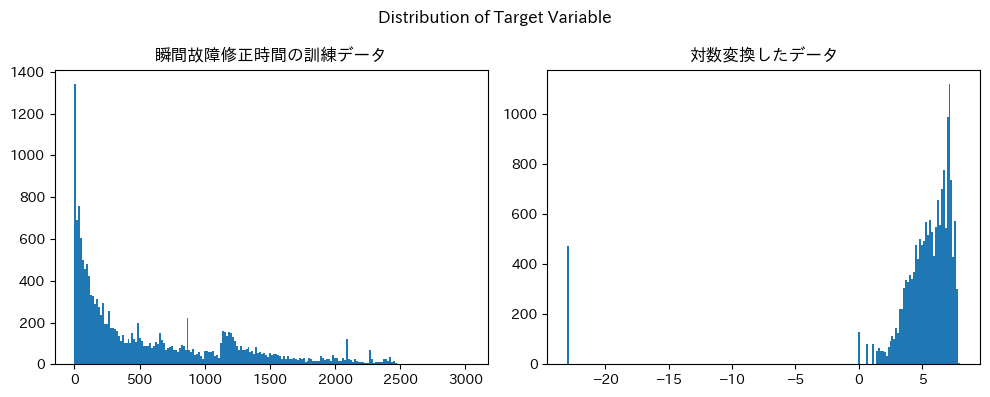

In [16]:
# 2つのヒストグラムを作成するためのサブプロットを設定
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# 各ヒストグラムを作成
axs[0].hist(y_train, bins=200)  # ビンの数を適宜調整
axs[0].set_title('瞬間故障修正時間の訓練データ')

# 他のヒストグラムも同様に作成
axs[1].hist(y_train_log, bins=200)  # ビンの数を適宜調整
axs[1].set_title('対数変換したデータ')

# 図全体のタイトルを設定
fig.suptitle('Distribution of Target Variable')

# サブプロット間の余白を調整
fig.tight_layout()

plt.savefig("drive/MyDrive/見原/Images/hist.png")
# ヒストグラムを表示
plt.show()


# CPCV法の実装

## ADF検定

In [ ]:
from tqdm.notebook import tqdm
def adf(df, cols, pct):
    """
    各特徴量に対してADF検定を行い，非定常な特徴量を返す関数

    Parameters
    ==========
    df: pandas dataframe
        特徴量が格納されたdataframe
    cols: list
        ADF検定を行う特徴量のカラム名が格納されたlist
    pct: '1%' or '5%' or '10%'
        信頼区間の幅を表すstr

    Returns
    =======
    unsteady_list: list
        非定常である特徴量の名前が格納されたlist
    """
    unsteady_list = []

    for col in tqdm(cols, total=len(cols)):
        stats = adfuller(df[col])
        test_stat_value = stats[0]
        critical_value = stats[4][pct]
        if test_stat_value > critical_value:
            unsteady_list.append(col)

    return unsteady_list

In [ ]:
unsteady_list = adf(x_train, x_train.columns, '5%')
print(f'元の特徴量の数: {len(x_train.columns)}')
print(f'非定常な特徴量の数: {len(unsteady_list)}')
print(f'非定常な特徴量: \n{unsteady_list}')

  0%|          | 0/43 [00:00<?, ?it/s]

元の特徴量の数: 43
非定常な特徴量の数: 2
非定常な特徴量: 
['year', 'index']


In [ ]:
unsteady_list = adf(train, train.columns, '5%')
print(f'元の特徴量の数: {len(train.columns)}')
print(f'非定常な特徴量の数: {len(unsteady_list)}')
print(f'非定常な特徴量: \n{unsteady_list}')

  0%|          | 0/45 [00:00<?, ?it/s]

元の特徴量の数: 45
非定常な特徴量の数: 2
非定常な特徴量: 
['year', 'index']


## CPCV法の実装(Optunaでチューニング）

In [30]:
def cpcv_cv(df, n_split=5, n_purge=5):
    """
    CPCV（Cross-Period Cross-Validation）による検証を行うために、データを分割する関数

    Parameters
    ==========
    df: pandas DataFrame
        特徴量と目的変数を格納したDataFrame
    n_split: int
        CVの分割数
    n_purge: int
        パージングするレコード数

    Returns
    =======
    indices: list
        各要素が各foldの[学習期間のインデックス, 検証期間のインデックス]になっているリスト
    """

    length = len(df)
    indices = []
    split_idx = [int(length * i / n_split) for i in range(n_split + 1)]

    for i in range(n_split):
        val_from = split_idx[i]
        val_to = split_idx[i + 1]
        val_idx = list(range(val_from, val_to))
        train_idx = []
        if val_from - n_purge > 0:
            train_idx += list(range(val_from - n_purge))
        if val_to + n_purge < length:
            train_idx += list(range(val_to + n_purge, length))
        indices.append([train_idx, val_idx])

    return indices

In [31]:
def training(df, features, y, model, n_split=5, n_purge=10):
    """
    CPCVによりモデルを学習させ、各学習済みモデルによる予測を作成する関数

    Parameters
    ==========
    df: pandas dataframe
        特徴量とラベルが格納されたDataFrame
    features: list
        モデルの学習に用いる特徴量の名前(str)が格納されたlist
    y: str
        モデルの学習に用いるラベルの名前
    model:
        学習に用いるモデル
    n_split: int
        CPCVの分割数
    n_purge: int
        パージングするレコード数

    Returns
    ==========
    ret: pandas dataframe
        モデルの予測結果が格納されたDataFrame
    """

    cv = cpcv_cv(df, n_split=n_split, n_purge=n_purge)

    ret = df[[y]].copy()
    ret['predict'] = 0

    for train_idx, val_idx in cv:
        train_idx = df.index[train_idx]
        val_idx = df.index[val_idx]
        model.fit(df.loc[train_idx, features], df.loc[train_idx, y])
        ret.loc[val_idx, 'predict'] = model.predict(df.loc[val_idx, features])

    return ret

In [32]:
def run(trial, df, features):
    """
    モデルのハイパーパラメータの最適化を行う関数

    Parameters
    ==========
    trial: optuna.trial.Trial

    Returns
    =======
    criterion: float
        各試行で得られたクロスエントロピーの値
    """

    max_depth = trial.suggest_int('max_depth', 3, 10)
    model = lgb.LGBMRegressor(max_depth=max_depth, random_state=random_state)
    # model = RandomForestRegressor(max_depth=max_depth, random_state=random_state)

    Xy = df.dropna(axis=0)
    ret = training(Xy, features, 'TTR', model=model, n_split=10, n_purge=10)
    Xy = pd.concat([Xy, ret], axis=1)
    criterion = mean_squared_error(ret['TTR'].values, ret['predict'].values)

    return criterion

In [33]:
%%time
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

random_state = check_random_state(seed)
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

features = x_train_log.columns.to_list()

study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: run(trial, train_log, features), n_trials=5, show_progress_bar=True)
best_params = study.best_params
print(f'best_params: {best_params}')

[I 2023-08-03 13:34:13,035] A new study created in memory with name: no-name-eb1c9007-aaca-44a1-be2e-6216d43b6ae8


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2023-08-03 13:34:17,071] Trial 0 finished with value: 19.336947951125175 and parameters: {'max_depth': 4}. Best is trial 0 with value: 19.336947951125175.
[I 2023-08-03 13:34:25,098] Trial 1 finished with value: 19.752506020480702 and parameters: {'max_depth': 8}. Best is trial 0 with value: 19.336947951125175.
[I 2023-08-03 13:34:33,205] Trial 2 finished with value: 19.619208079281847 and parameters: {'max_depth': 9}. Best is trial 0 with value: 19.336947951125175.
[I 2023-08-03 13:34:39,517] Trial 3 finished with value: 19.518348302258165 and parameters: {'max_depth': 6}. Best is trial 0 with value: 19.336947951125175.
[I 2023-08-03 13:34:44,880] Trial 4 finished with value: 19.619208079281847 and parameters: {'max_depth': 9}. Best is trial 0 with value: 19.336947951125175.
best_params: {'max_depth': 4}
CPU times: user 28.6 s, sys: 267 ms, total: 28.9 s
Wall time: 32.9 s


In [ ]:
from statsmodels.tsa import stattools
def adf_test(series):
    adf_df = pd.DataFrame(
        [
            stattools.adfuller(series)[1]
        ],
        columns=['P値']
    )
    adf_df['P値'] = adf_df['P値'].round(decimals=3).astype(str)
    print(adf_df)

# 原系列のp値を算出
adf_test(series=data_set['TBF'])

    P値
0  0.0


## CPCV法の実装（予測）

In [26]:
def make_models(df, features, best_params, y):
    """
    与えられたベストパラメータを用いてPurged CVにより学習済みモデルを作成する関数

    Parameters
    ==========
    df: pandas dataframe
        特徴量とラベルが格納されたdataframe
    features: list
        モデルの学習に用いる特徴量の名前(str)が格納されたlist
    y: str
        モデルの学習に用いるラベルの名前
    best_params: dictionary
        探索で得たモデルのベストパラメータ

    Return
    ======
    models: list
        学習済みモデルを格納したリスト
    """

    models = []
    model = lgb.LGBMRegressor(max_depth=best_params['max_depth'], random_state=random_state)
    # model = xgb.XGBRegressor(random_state=random_state)
    # model = RandomForestRegressor(random_state=random_state)
    train_idx = df.index
    model.fit(df.loc[:, features], df.loc[:, y])
    models.append(model)

    return models

In [22]:
def cpcv(df, n_split=5, n_purge=5):
    """CPCV用のK-Fold

    Parameters:
    ==========
    df: pd.DataFrame
        特徴量と目的変数を格納したDataFrame
    n_split: int
        CVの分割数
    n_purge: int
        パージングする数

    Returns:
    ==========
    ret: list
        以下の要素を持ったリスト
        - train_idx: list
            学習期間のインデックス
        - val_idx1: list
            一つ目の検証期間のインデックス
        - val_idx2: list
            二つ目の検証期間のインデックス
        - weights: list
            各データポイントに対するウェイト
    """
    length = len(df)
    idx = list(range(length))
    ret = []

    weights = np.arange(length, 0, -1)  # 直近のデータに高いウェイトを設定（例としては逆順になっています）
    # weights = []

    split_idx = [int(length * i / n_split) for i in range(n_split + 1)]

    for i in range(n_split):
        for j in range(i + 1, n_split):
            val_from1 = split_idx[i]
            val_to1 = split_idx[i + 1]
            val_from2 = split_idx[j]
            val_to2 = split_idx[j + 1]
            val_idx1 = idx[val_from1:val_to1]
            val_idx2 = idx[val_from2:val_to2]
            train_idx = []
            if val_from1 - n_purge > 1:
                train_idx += idx[:val_from1 - n_purge]
            if val_to1 + n_purge < val_from2 - n_purge:
                train_idx += idx[val_to1 + n_purge:val_from2 - n_purge]
            if val_to2 + n_purge < len(idx):
                train_idx += idx[val_to2 + n_purge:]
            ret.append([train_idx, val_idx1, val_idx2, weights])

    return ret

In [34]:
# CPCV法による学習と予測
%%time

random_state = check_random_state(seed)
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
from tqdm import tqdm
import xgboost as xgb
from sklearn.metrics import mean_squared_error


###########################################
# 10で割り切れないので、先頭から2行を削除
train2 = train_log.drop(train_log.index[:1])
###########################################

# 特徴量の選択
# features = train2.drop("TTR", axis = 1).columns.to_list()
n_purge = 175
cpcv_splits = cpcv(train2, n_split=10, n_purge= n_purge)
y_pred_list = []

for i, (train_idx, val_idx1, val_idx2, weights) in enumerate(cpcv_splits):

    train_data = train2.iloc[train_idx]
    val_data1 = train2.iloc[val_idx1]
    val_data2 = train2.iloc[val_idx2]

    # モデルの学習
    models = make_models(train_data, features, best_params, 'TTR')

    print("\nエポック数",i+1)
    # 一つ目の検証データの予測
    y_pred1_list = []
    for model in models:
        y_pred1 = model.predict(val_data1[features])
        y_pred1_list.append(y_pred1)
        rmse1 = np.sqrt(mean_squared_error(val_data1['TTR'], np.mean(y_pred1_list, axis=0)))
        # print("\n検証データ1のRMSE:", rmse1)

    # 二つ目の検証データの予測
    y_pred2_list = []
    for model in models:
        y_pred2 = model.predict(val_data2[features])
        y_pred2_list.append(y_pred2)
        rmse2 = np.sqrt(mean_squared_error(val_data2['TTR'], np.mean(y_pred2_list, axis=0)))
        # print("\n検証データ2のRMSE:", rmse2)


    # テストデータの予測
    y_pred_test_list = []
    for model in tqdm(models, total=len(models)):
        y_pred_test = model.predict(test_log[features])
        y_pred_test_list.append(y_pred_test)

        rmse1 = np.sqrt(mean_squared_error(val_data1['TTR'], np.mean(y_pred1_list, axis=0)))
        rmse2 = np.sqrt(mean_squared_error(val_data2['TTR'], np.mean(y_pred2_list, axis=0)))
        # print("\n検証データ1の最終結果 : ",np.exp(rmse1))
        # print("\n検証データ2の最終結果 : ",np.exp(rmse2))
        print("\nValid 途中経過 : ",( np.exp(rmse1) + np.exp(rmse2) ) / 2)

    y_pred_list.append((np.mean(y_pred1_list, axis=0), np.mean(y_pred2_list, axis=0), np.mean(y_pred_test_list, axis=0)))

# 予測結果の平均化
# y_pred1_avg = np.average([pred[0] for pred in y_pred_list], axis=0, weights=[weights[val_idx1] for _, val_idx1, _, weights in cpcv_splits])
# y_pred2_avg = np.average([pred[1] for pred in y_pred_list], axis=0, weights=[weights[val_idx2] for _, _, val_idx2, weights in cpcv_splits])

y_pred1_avg = np.average([pred[0] for pred in y_pred_list], axis=0) # 重みなし
y_pred2_avg = np.average([pred[1] for pred in y_pred_list], axis=0) # 重みなし

y_pred_test_avg = np.mean([pred[2] for pred in y_pred_list], axis=0)

print("\n検証データ1の予測結果:")
print(y_pred1_avg)
print("\n検証データ2の予測結果:")
print(y_pred2_avg)
print("\nテストデータの予測結果:")
print(y_pred_test_avg)

# 評価データの最終結果
rmse1 = np.sqrt(mean_squared_error(val_data1['TTR'], np.mean(y_pred1_list, axis=0)))
rmse2 = np.sqrt(mean_squared_error(val_data2['TTR'], np.mean(y_pred2_list, axis=0)))
print("\n検証データ1の最終結果 : ",np.exp(rmse1))
print("\n検証データ2の最終結果 : ",np.exp(rmse2))
print("\n最終結果 : ",( np.exp(rmse1) + np.exp(rmse2) ) / 2)


エポック数 1


100%|██████████| 1/1 [00:00<00:00, 46.07it/s]


Valid 途中経過 :  11.436649676725864



エポック数 2


100%|██████████| 1/1 [00:00<00:00, 53.04it/s]


Valid 途中経過 :  17.729217677668736



エポック数 3


100%|██████████| 1/1 [00:00<00:00, 35.20it/s]


Valid 途中経過 :  20.083323664450095



エポック数 4


100%|██████████| 1/1 [00:00<00:00, 35.76it/s]


Valid 途中経過 :  68.63480578132607



エポック数 5


100%|██████████| 1/1 [00:00<00:00, 27.82it/s]


Valid 途中経過 :  64.39692198849929



エポック数 6


100%|██████████| 1/1 [00:00<00:00, 34.68it/s]


Valid 途中経過 :  54.114805936771916



エポック数 7


100%|██████████| 1/1 [00:00<00:00, 30.59it/s]


Valid 途中経過 :  71.38345196857455



エポック数 8


100%|██████████| 1/1 [00:00<00:00, 40.65it/s]


Valid 途中経過 :  118.30275166199277



エポック数 9


100%|██████████| 1/1 [00:00<00:00, 30.33it/s]


Valid 途中経過 :  349.88138079350927



エポック数 10


100%|██████████| 1/1 [00:00<00:00, 34.04it/s]


Valid 途中経過 :  15.177290383934016



エポック数 11


100%|██████████| 1/1 [00:00<00:00, 37.61it/s]


Valid 途中経過 :  17.754232145949096



エポック数 12


100%|██████████| 1/1 [00:00<00:00, 37.18it/s]


Valid 途中経過 :  68.94656438791218



エポック数 13


100%|██████████| 1/1 [00:00<00:00, 45.76it/s]


Valid 途中経過 :  62.91624319826753



エポック数 14


100%|██████████| 1/1 [00:00<00:00, 49.94it/s]


Valid 途中経過 :  51.13669575306796



エポック数 15


100%|██████████| 1/1 [00:00<00:00, 51.32it/s]


Valid 途中経過 :  70.20530884045407



エポック数 16


100%|██████████| 1/1 [00:00<00:00, 50.17it/s]


Valid 途中経過 :  117.91346958655734



エポック数 17


100%|██████████| 1/1 [00:00<00:00, 47.95it/s]


Valid 途中経過 :  344.85081603907906



エポック数 18


100%|██████████| 1/1 [00:00<00:00, 48.71it/s]


Valid 途中経過 :  27.474738216256746



エポック数 19


100%|██████████| 1/1 [00:00<00:00, 44.22it/s]


Valid 途中経過 :  78.42059143077677



エポック数 20


100%|██████████| 1/1 [00:00<00:00, 52.33it/s]


Valid 途中経過 :  66.7448397752541



エポック数 21


100%|██████████| 1/1 [00:00<00:00, 49.01it/s]


Valid 途中経過 :  59.97078257823397



エポック数 22


100%|██████████| 1/1 [00:00<00:00, 48.61it/s]


Valid 途中経過 :  77.10728191431355



エポック数 23


100%|██████████| 1/1 [00:00<00:00, 33.36it/s]


Valid 途中経過 :  132.84237557849585



エポック数 24


100%|██████████| 1/1 [00:00<00:00, 45.24it/s]


Valid 途中経過 :  346.6851293452169



エポック数 25


100%|██████████| 1/1 [00:00<00:00, 50.05it/s]


Valid 途中経過 :  75.85347700809021



エポック数 26


100%|██████████| 1/1 [00:00<00:00, 47.54it/s]


Valid 途中経過 :  70.82583411090305



エポック数 27


100%|██████████| 1/1 [00:00<00:00, 45.46it/s]


Valid 途中経過 :  62.402923533859344



エポック数 28


100%|██████████| 1/1 [00:00<00:00, 45.66it/s]


Valid 途中経過 :  79.297015496532



エポック数 29


100%|██████████| 1/1 [00:00<00:00, 48.04it/s]


Valid 途中経過 :  135.593831975915



エポック数 30


100%|██████████| 1/1 [00:00<00:00, 46.47it/s]


Valid 途中経過 :  382.3608900531689



エポック数 31


100%|██████████| 1/1 [00:00<00:00, 45.04it/s]


Valid 途中経過 :  139.10804940898856



エポック数 32


100%|██████████| 1/1 [00:00<00:00, 50.02it/s]


Valid 途中経過 :  117.76136871879172



エポック数 33


100%|██████████| 1/1 [00:00<00:00, 43.86it/s]


Valid 途中経過 :  134.44423016985363



エポック数 34


100%|██████████| 1/1 [00:00<00:00, 45.13it/s]


Valid 途中経過 :  189.1741316064598



エポック数 35


100%|██████████| 1/1 [00:00<00:00, 46.95it/s]


Valid 途中経過 :  448.77962436068583



エポック数 36


100%|██████████| 1/1 [00:00<00:00, 50.50it/s]


Valid 途中経過 :  110.51162126652827



エポック数 37


100%|██████████| 1/1 [00:00<00:00, 45.46it/s]


Valid 途中経過 :  127.03889728706204



エポック数 38


100%|██████████| 1/1 [00:00<00:00, 42.17it/s]


Valid 途中経過 :  174.08806426665686



エポック数 39


100%|██████████| 1/1 [00:00<00:00, 32.17it/s]


Valid 途中経過 :  416.63856132041093



エポック数 40


100%|██████████| 1/1 [00:00<00:00, 41.50it/s]


Valid 途中経過 :  119.45200308520205



エポック数 41


100%|██████████| 1/1 [00:00<00:00, 40.99it/s]


Valid 途中経過 :  163.5461541807581



エポック数 42


100%|██████████| 1/1 [00:00<00:00, 41.80it/s]


Valid 途中経過 :  395.2559351671621



エポック数 43


100%|██████████| 1/1 [00:00<00:00, 37.77it/s]


Valid 途中経過 :  181.35031303433632



エポック数 44


100%|██████████| 1/1 [00:00<00:00, 35.41it/s]


Valid 途中経過 :  415.28308966175535



エポック数 45


100%|██████████| 1/1 [00:00<00:00, 39.43it/s]


Valid 途中経過 :  431.9382031295397

検証データ1の予測結果:
[5.50157503 5.93023811 4.95656127 ... 5.28642869 5.28935959 5.13935066]

検証データ2の予測結果:
[3.7583492  4.24170133 4.08947374 ... 3.82813404 5.17818539 4.24912386]

テストデータの予測結果:
[4.66349094 1.83243902 4.52016636 ... 3.43154426 0.41475362 3.85584763]

検証データ1の最終結果 :  240.29950572879318

検証データ2の最終結果 :  623.5769005302863

最終結果 :  431.9382031295397
CPU times: user 19 s, sys: 166 ms, total: 19.1 s
Wall time: 19.7 s


In [ ]:
# LightGBM
print("\nn_purge : ",n_purge)
print("\n最終結果 : ",( np.exp(rmse1) + np.exp(rmse2) ) / 2)


n_purge :  175

最終結果 :  438.38220227022373


In [ ]:
# RondomForest
# print("\nn_purge : ",n_purge)
# print("\n最終結果 : ",( np.exp(rmse1) + np.exp(rmse2) ) / 2)


n_purge :  2300

最終結果 :  885.1000732811839


### 指数変換

In [35]:
y_pred_restored = np.exp(y_pred_test_avg)

### 可視化

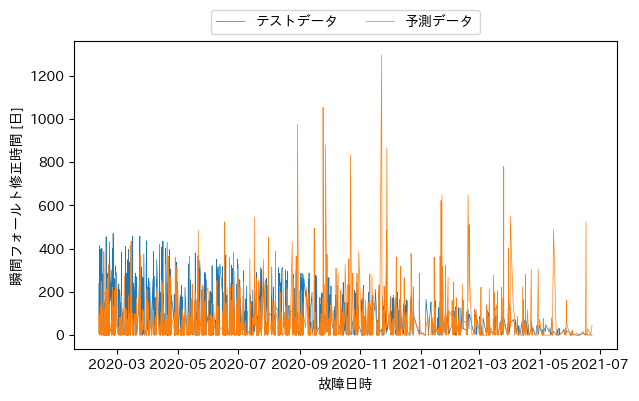

In [36]:
# テストデータに対する推定結果のプロット
fig, axs = plt.subplots(figsize=(7, 4))
plt.plot(y_test, lw=0.5)
plt.plot(pd.DataFrame(y_pred_restored, index=y_test.index), lw=0.5)
plt.xlabel('故障日時')
plt.ylabel('瞬間フォールト修正時間 [日]')
plt.legend(['テストデータ', '予測データ'], loc='lower center', bbox_to_anchor=(.5, 1.0), ncol=3)
plt.savefig("drive/MyDrive/見原/Images/pred.png")
plt.show()

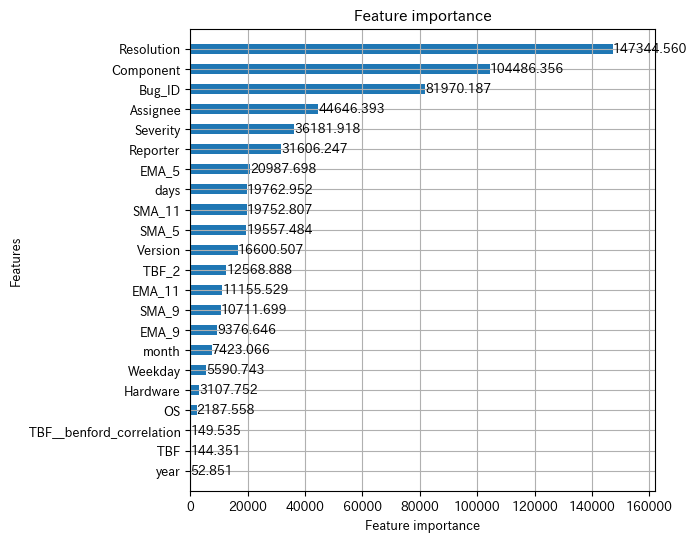

In [ ]:
# 特徴量の重要度
lgb.plot_importance(model, height = 0.5, figsize = (6,6), importance_type='gain')
plt.savefig("drive/MyDrive/見原/Images/importance.png")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

print("LightGBM RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_restored)))
print("LightGBM MAPE:",mean_absolute_percentage_error(y_test, y_pred_restored))
print("LightGBM R2:",r2_score(y_test, y_pred_restored))

LightGBM RMSE: 135.3933928009083
LightGBM MAPE: 5382235191042888.0
LightGBM R2: -1.0750176114916288


## Shap による可視化
---
https://qiita.com/ku_a_i/items/74241c84cda8c7327277　を参考

---

In [ ]:
# Shap で可視化
explainer = shap.TreeExplainer(model=model)

print(explainer.expected_value)

[5.27140828]


In [ ]:
X_test_shap = x_test.copy().reset_index(drop=True)
shap_values = explainer.shap_values(X=X_test_shap)
print(X_test_shap.shape)
print(shap_values.shape)
print(shap_values[0])#テストデータの0番目の要素を出力

(1901, 49)
(1901, 49)
[-1.13278464e+00  5.88221796e-02 -1.58832315e-01  2.85324595e-01
  7.86594507e-01 -2.02656619e-02 -2.29376693e-02  2.53912544e-01
  1.00121183e-01 -2.89104375e-03 -2.05802877e-01 -1.65992360e-03
  2.83119761e-02  3.99410800e-04  3.94049703e-03  0.00000000e+00
  2.70902108e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.78230314e-01
 -2.74571609e-02  1.52590511e-01  5.06624595e-01 -1.23308950e-01
  1.30466422e-02]


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


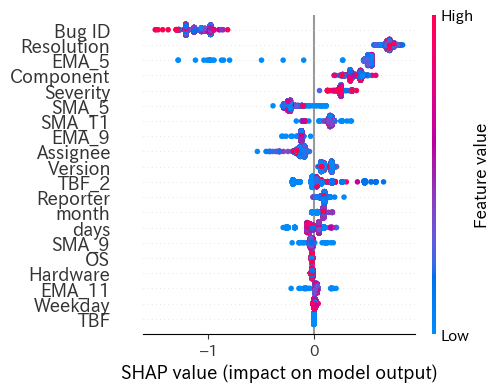

In [ ]:
shap.summary_plot(shap_values, X_test_shap, plot_size = (5,4),show=False)
plt.savefig("drive/MyDrive/見原/Images/shap.png")
plt.show()

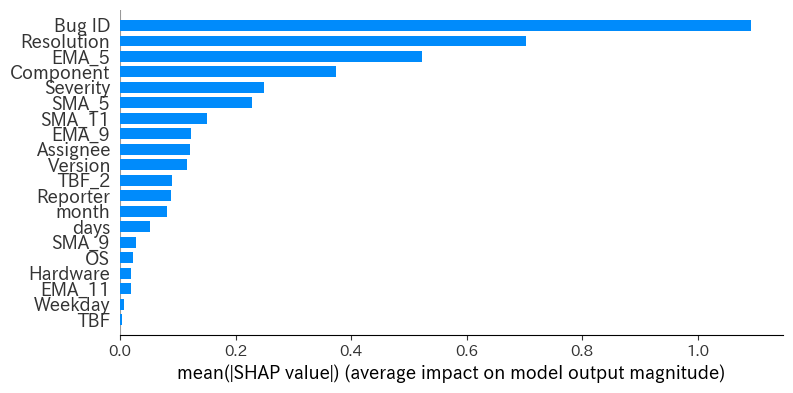

In [ ]:
shap.summary_plot(shap_values, X_test_shap, plot_type='bar', plot_size = (8,4),show=False)
plt.savefig("drive/MyDrive/見原/Images/shap_importance.png")
plt.show()

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


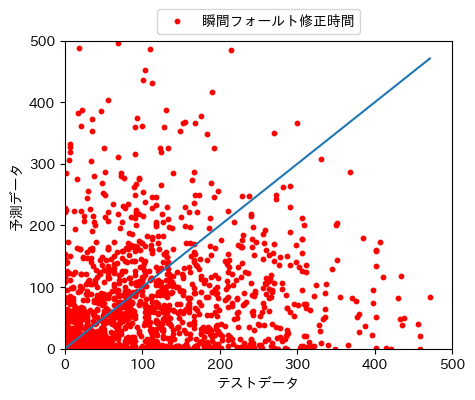

In [37]:
# テストデータに対する推定結果の散布図
fig, axs = plt.subplots(figsize=(5, 4))
plt.scatter(y_test, y_pred_restored, c='r', s=10)
plt.xlabel('テストデータ')
plt.ylabel('予測データ')
plt.legend(['瞬間フォールト修正時間'], loc='lower center', bbox_to_anchor=(.5, 1.0), ncol=3)
plt.plot([0,np.amax(y_test)],[0,np.amax(y_test)])
plt.xlim(0,500)
plt.ylim(0,500)
plt.savefig("drive/MyDrive/見原/Images/scatter.png")
plt.show()


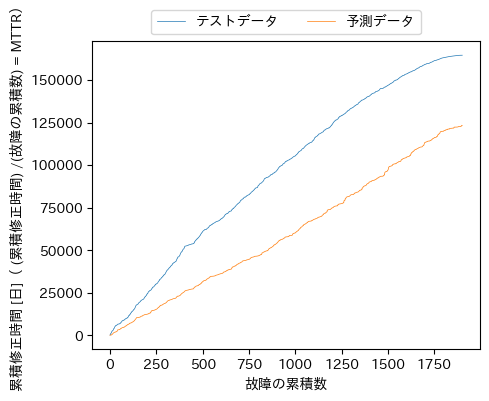

In [41]:
# テストデータに対する推定された累積時間データのプロット
fig, axs = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(y_test.reset_index(drop=True)), lw=0.5)
plt.plot(np.cumsum(y_pred_restored), lw=0.5)
plt.xlabel('故障の累積数')
plt.ylabel('累積修正時間 [日]（ (累積修正時間) /(故障の累積数) = MTTR）')
plt.legend(['テストデータ', '予測データ'], loc='lower center', bbox_to_anchor=(.5, 1.0), ncol=3)
plt.savefig("drive/MyDrive/見原/Images/cumsum_pred.png")
plt.show()


## N-Beats

In [42]:
# 標準化
from sklearn.preprocessing import StandardScaler

column = ["Bug ID", "Resolution", "EMA_5", "Component",
          "Severity",  "SMA_5", "SMA_11", "EMA_9",
          "Assignee","Version", "TBF_2","Reporter",
          "month", "days", "SMA_9", "OS",
          "Hardware", "EMA_11", "Weekday", "TBF"]

sc = StandardScaler()
x_train_N = sc.fit_transform(x_train_log[column])
x_test_N = sc.transform(x_test_log[column])

In [43]:
def N_beats(input_shape, horizon, n_stacks, n_neurons, n_layers):
    # 入力層
    input_layer = Input(shape=input_shape)

    # N-Beatsアーキテクチャのスタック部分
    forecast_layers = []
    backcast_layers = []
    for stack in range(n_stacks):
        backcast = input_layer
        for layer in range(n_layers):
            fc = Dense(units=n_neurons, activation='relu')(backcast)
            backcast = Dense(units=n_neurons, activation='relu')(fc)
            forecast = Dense(units=n_neurons, activation='relu')(backcast)
            forecast = Dense(units=1)(forecast)
            forecast_layers.append(forecast)
            backcast_layers.append(backcast)

    # スタックの予測結果を結合
    forecast_concat = Concatenate()(forecast_layers)
    backcast_concat = Concatenate()(backcast_layers)

    # 予測結果を和集合し、最終的な予測を得る
    forecast_final = Dense(units=horizon * n_stacks)(forecast_concat)
    backcast_final = Dense(units=horizon * n_stacks)(backcast_concat)
    y_pred = Concatenate()([backcast_final, forecast_final])

    # モデルの定義
    model = Model(inputs=input_layer, outputs=y_pred)

    return model

In [ ]:
print(type(x_train_log))

<class 'pandas.core.frame.DataFrame'>


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Input, LSTM, Dense, Activation, Attention, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Bidirectional, RepeatVector
from tensorflow_addons.optimizers import AdamW

random_state = check_random_state(seed)
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

input_shape =  (None, x_train_log[column].shape[1]) # 入力の形状
num_classes = 1

# ハイパーパラメータの設定
horizon = 10  # 予測するステップ数
n_stacks = 15  # スタック数
n_neurons = 32  # 各スタックのニューロン数
n_layers = 3  # 各スタックのレイヤー数

# N-BEATSモデルの構築
model = N_beats(input_shape, horizon, n_stacks, n_neurons, n_layers)

# モデルのコンパイル
AdamW = AdamW(learning_rate=0.01, weight_decay=0.001)  # Adjust learning rate and weight_decay as needed
Adam = Adam(learning_rate=0.01, weight_decay=0.001)
model.compile(optimizer=AdamW, loss='mse')

In [45]:
# モデルの情報を可視化
model.summary()

from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)
# plt.savefig("drive/MyDrive/見原/Images/N_beats.png") #画像を保存
# モデルの構造を画像ファイルに保存（dpiを変更して画像サイズを調整）
plot_model(model, to_file="drive/MyDrive/見原/Images/N_beats.png", show_shapes=True, show_layer_names=True, expand_nested=True, dpi=300)

Output hidden; open in https://colab.research.google.com to view.

In [46]:
# コサインアニーリングのスケジューラ関数
import math
from tensorflow.keras.callbacks import LearningRateScheduler
def cosine_annealing(epoch, lr):
    max_epochs = 100  # コサインアニーリングを適用するエポック数（適宜変更してください）
    min_lr = 1e-6    # 最小の学習率（適宜変更してください）

    cos_val = (1 + math.cos(math.pi * epoch / max_epochs)) / 2
    new_lr = min_lr + (lr - min_lr) * cos_val
    return new_lr

In [51]:
%%time
from tensorflow.keras.callbacks import EarlyStopping
# tf.config.run_functions_eagerly(True)
# early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)

# コサインアニーリングのスケジューラを作成
lr_scheduler = LearningRateScheduler(cosine_annealing)

model.fit(x_train_N,  # エンコーダー入力とデコーダー入力をリストで渡す
          y_train_log,
          batch_size=128,
          epochs=10,
          callbacks=[lr_scheduler],
          validation_data=(x_test_N, y_test_log)
)


Epoch 1/10
134/134 [==============================] - 20s 48ms/step - loss: 22.8834 - val_loss: 53.2288 - lr: 0.0100
Epoch 2/10
134/134 [==============================] - 8s 57ms/step - loss: 21.4809 - val_loss: 56.4031 - lr: 0.0100
Epoch 3/10
134/134 [==============================] - 5s 36ms/step - loss: 20.9954 - val_loss: 57.8925 - lr: 0.0100
Epoch 4/10
134/134 [==============================] - 6s 44ms/step - loss: 20.9159 - val_loss: 52.7709 - lr: 0.0100
Epoch 5/10
134/134 [==============================] - 7s 50ms/step - loss: 20.7305 - val_loss: 56.4167 - lr: 0.0099
Epoch 6/10
134/134 [==============================] - 5s 36ms/step - loss: 20.6562 - val_loss: 51.9850 - lr: 0.0099
Epoch 7/10
134/134 [==============================] - 7s 55ms/step - loss: 20.5485 - val_loss: 52.2056 - lr: 0.0098
Epoch 8/10
134/134 [==============================] - 5s 37ms/step - loss: 20.4900 - val_loss: 52.8923 - lr: 0.0097
Epoch 9/10
134/134 [==============================] - 5s 36ms/step - lo

In [52]:
# N-Beatsの予測
y_pred_N = model.predict(x_test_N)
y_pred_NB = np.exp(y_pred_N)
y_pred_NB_merged = np.mean(y_pred_NB, axis=1)

# y_pred_NB_flat = y_pred_NB.flatten()  # 予測結果を1次元に平坦化
print("N-Beats predictions:", np.sqrt(mean_squared_error(y_test, y_pred_NB_merged)))


60/60 [==============================] - 2s 9ms/step
N-Beats predictions: 112.12826257525373


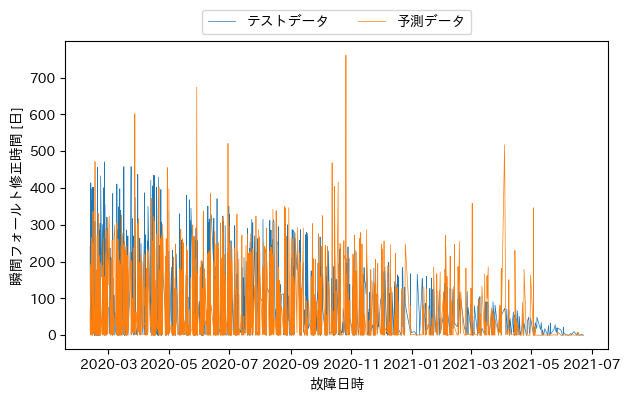

In [53]:
# テストデータに対する推定結果のプロット
fig, axs = plt.subplots(figsize=(7, 4))
plt.plot(y_test, lw=0.5)
plt.plot(pd.DataFrame(y_pred_NB_merged, index=y_test.index), lw=0.5)
plt.xlabel('故障日時')
plt.ylabel('瞬間フォールト修正時間 [日]')
plt.legend(['テストデータ', '予測データ'], loc='lower center', bbox_to_anchor=(.5, 1.0), ncol=3)
plt.savefig("drive/MyDrive/見原/Images/N-Beats.png")
plt.show()

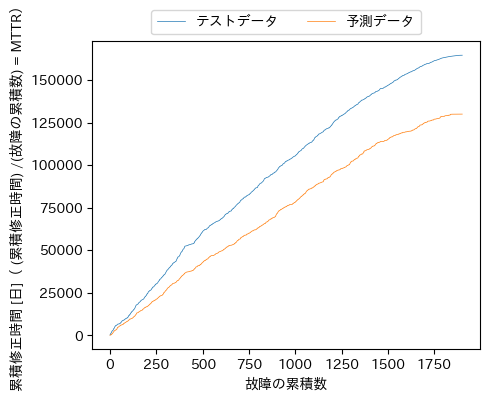

In [54]:
# テストデータに対する推定された累積時間データのプロット
fig, axs = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(y_test.reset_index(drop=True)), lw=0.5)
plt.plot(np.cumsum(y_pred_NB_merged), lw=0.5)
plt.xlabel('故障の累積数')
plt.ylabel('累積修正時間 [日]（ (累積修正時間) /(故障の累積数) = MTTR）')
plt.legend(['テストデータ', '予測データ'], loc='lower center', bbox_to_anchor=(.5, 1.0), ncol=3)
plt.savefig("drive/MyDrive/見原/Images/NB_cumsum_pred.png")
plt.show()


In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


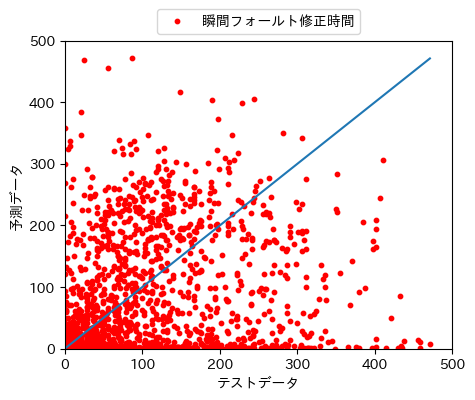

In [55]:
# テストデータに対する推定結果の散布図
fig, axs = plt.subplots(figsize=(5, 4))
plt.scatter(y_test, y_pred_NB_merged, c='r', s=10)
plt.xlabel('テストデータ')
plt.ylabel('予測データ')
plt.legend(['瞬間フォールト修正時間'], loc='lower center', bbox_to_anchor=(.5, 1.0), ncol=3)
plt.plot([0,np.amax(y_test)],[0,np.amax(y_test)])
plt.xlim(0,500)
plt.ylim(0,500)
plt.savefig("drive/MyDrive/見原/Images/NB_scatter.png")
plt.show()


# 通常のHold-Outによる予測

In [56]:
# LightGBMによる予測
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(random_state=random_state)
# lgb_model.fit(x_train_log, y_train_log)
# y_pred = lgb_model.predict(x_test_log)
lgb_model.fit(x_train_log, y_train_log)
y_pred = lgb_model.predict(x_test_log)

In [57]:
# 指数変換
y_pred_restored = np.exp(y_pred)
# y_test_restored = np.exp(y_test_log)

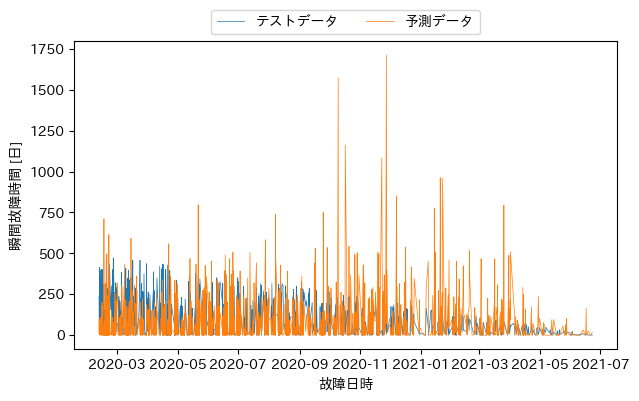

In [59]:
# テストデータに対する推定結果のプロット
fig, axs = plt.subplots(figsize=(7, 4))
plt.plot(y_test, lw=0.5)
plt.plot(pd.DataFrame(y_pred_restored, index=y_test.index), lw=0.5)
plt.xlabel('故障日時')
plt.ylabel('瞬間故障時間 [日]')
plt.legend(['テストデータ', '予測データ'], loc='lower center', bbox_to_anchor=(.5, 1.0), ncol=3)
plt.savefig("drive/MyDrive/見原/Images/Simple_HoldOut.png")
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
print("LightGBM predictions:",np.sqrt(mean_squared_error(y_test, y_pred_restored)))

LightGBM predictions: 148.0510133429807


In [ ]:
from tbats import TBATS, BATS
tbats_model = TBATS(seasonal_periods=(48, 336))
fitted_model = tbats_model.fit(y_train)

# y_hat =
# 予測
train_pred = fitted_model.y_hat #学習データの期間

test_pred = fitted_model.forecast(steps=len(y_test)) #テストデータの期間
# 精度指標（テストデータ）
print('RMSE:')
print(np.sqrt(mean_squared_error(y_test, test_pred)))
# print('MAE:')
# print(mean_absolute_error(y_test, test_pred))
print('MAPE:')
print(mean_absolute_percentage_error(y_test, test_pred))

RMSE:
108.42716484684244
MAPE:
5.531209430053429e+16


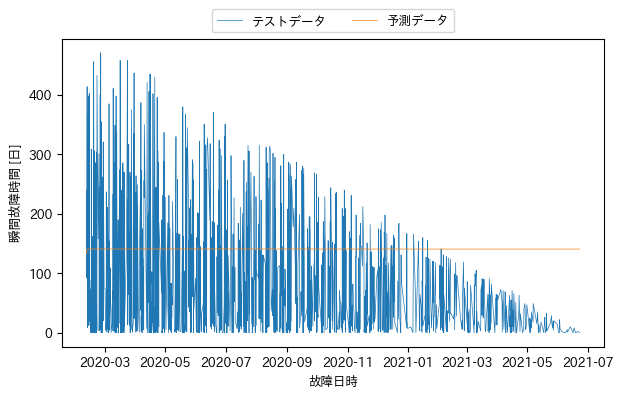

In [ ]:
# テストデータに対する推定結果のプロット
fig, axs = plt.subplots(figsize=(7, 4))
plt.plot(y_test, lw=0.5)
plt.plot(pd.DataFrame(test_pred, index=y_test.index), lw=0.5)
plt.xlabel('故障日時')
plt.ylabel('瞬間故障時間 [日]')
plt.legend(['テストデータ', '予測データ'], loc='lower center', bbox_to_anchor=(.5, 1.0), ncol=3)
plt.savefig("drive/MyDrive/見原/Images/TBATS.png")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
import xgboost as xgb

# SVMの学習と予測
# svm_model = SVC(random_state=random_state)
# svm_model.fit(x_train, y_train_log)
# svm_predictions = svm_model.predict(x_test)

# XGBoostの学習と予測
xgb_model = xgb.XGBRegressor(random_state=random_state)
xgb_model.fit(x_train_log, y_train_log)
xgb_predictions = xgb_model.predict(x_test_log)

# ランダムフォレストの学習と予測
rf_model = RandomForestRegressor(random_state=random_state)
rf_model.fit(x_train_log, y_train_log)
rf_predictions = rf_model.predict(x_test_log)

# リッジ回帰の学習と予測
ridge_model = Ridge(random_state=random_state)
ridge_model.fit(x_train_log, y_train_log)
ridge_predictions = ridge_model.predict(x_test_log)

# ラッソ回帰の学習と予測
lasso_model = Lasso(random_state=random_state)
lasso_model.fit(x_train_log, y_train_log)
lasso_predictions = lasso_model.predict(x_test_log)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
# 対数変換を元に戻す
y_pred_xgb = np.exp(xgb_predictions)

y_pred_rf = np.exp(rf_predictions)

y_pred_ridge = np.exp(ridge_predictions)

y_pred_lasso = np.exp(lasso_predictions)

In [ ]:
# 予測
print("XGBoost predictions:",np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

print("Random Forest predictions:",np.sqrt(mean_squared_error(y_test, y_pred_rf)))

print("Ridge predictions:",np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

print("Lasso predictions:",np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


XGBoost predictions: 1549.5012002280516
Random Forest predictions: 80.16336482096412
Ridge predictions: 88.22158291861125
Lasso predictions: 98.3710303323064
